# IMAGE CLASSIFICATION ON CIFAR-10 DATASET
shape => (32\*32\*3)<br>
Loaded via Keras.datasets<br>


### Importing Libraries
1. keras
2. matplotlib

### Importing Datasets
1. CIFAR-10

### Importing Layers
1. Conv2D
2. MaxPooling2D
3. Dropout
4. Dense
5. Flatten

### Importing Optimizers and Data Augmentation Tools
1. SGD
2. Adam
3. ImageDataGenerator

In [1]:
import sys
import keras
import keras as ks
import matplotlib
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD,Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

# Ananlyzing the shape of the data(Should be the first step of training)
print("shape of X_train and Y_train "+ str(X_train.shape)+" "+str(Y_train.shape))
print("shape of X_test and Y_test "+ str(X_test.shape)+" "+str(Y_test.shape))

170500096/170498071 [==============================] - 6s 0us/step
shape of X_train and Y_train (50000, 32, 32, 3) (50000, 1)
shape of X_test and Y_test (10000, 32, 32, 3) (10000, 1)


[6]
[9]
[9]
[4]
[1]


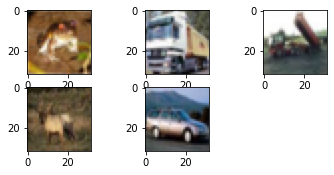

In [3]:
for i in range(5):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i])
    print(Y_train[i])
pyplot.show()

### Loading the Dataset
We load the dataset and change immediately into one_hot_vectors.<br>
to_categorical() used.

In [4]:
def load():
    (X_train,Y_train),(X_test,Y_test) = cifar10.load_data()
    Y_train=ks.utils.to_categorical(Y_train)
    Y_test=ks.utils.to_categorical(Y_test)
    return X_train,Y_train,X_test,Y_test

### Normalizing the Database
We need to make our data fit into a range where it can be seen more uniformly<br>
So, we divide all the pixel values by 255.

In [5]:
def normalize(train,test):
    trainNorm=train/255.0
    testNorm=test/255.0
    return trainNorm,testNorm

### Defining the Model (VGG Architecture)
First we need the Sequential Model as our layers are joined horizontally.

1. <b>Block 1</b>
    * 2D Convolution Layer (64 filters of 3\*3 shape)
    * 2D Convolution Layer (64 filters of 3\*3 shape)
    * MaxPooling Layer (2\*2 shape)
2. <b>Block 2</b>
    * 2D Convolution Layer (128 filters of 3\*3 shape)
    * 2D Convolution Layer (128 filters of 3\*3 shape)
    * MaxPooling Layer (2\*2 shape)
3. <b>Block 3</b>
    * 2D Convolution Layer (256 filters of 3\*3 shape)
    * 2D Convolution Layer (256 filters of 3\*3 shape)
    * 2D Convolution Layer (256 filters of 3\*3 shape)
    * MaxPooling Layer (2\*2 shape)
4. <b>Block 4</b>
    * 2D Convolution Layer (512 filters of 3\*3 shape)
    * 2D Convolution Layer (512 filters of 3\*3 shape)
    * 2D Convolution Layer (512 filters of 3\*3 shape)
    * MaxPooling Layer (2\*2 shape)
5. <b>Flatten</b>
6. <b>Dense Layer</b>(2048 hidden units) 
7. <b>Dense Layer</b>(2048 hidden units) 
8. <b>Dense Layer</b>(10 hidden units and activation="softmax")

Using Adam Optimizer (Due to Momentum + RMS) with Learning Rate of 0.001.


In [49]:
def getmodel():
    # Adding sequential to add layers sequentially as per our needs.
    model = ks.Sequential()
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(512,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(512,(3,3),activation='relu',padding='same',kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(2048, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dense(2048, activation='relu', kernel_initializer='he_uniform'))

    model.add(Dense(10, activation='softmax'))
    
    opt = Adam(lr=0.001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Training Model
1. Load the Dataset
2. Normalize the Dataset
3. Import the VGG Model
4. Add Data Augmentation to the input data
5. Fit the data to the model using fit_generator
6. Evaluate the model and find the test accuracy

In [50]:
model=getmodel()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_135 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_136 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 8, 8, 256)       

In [51]:
def trainModel():
    X_train,Y_train,X_test,Y_test=load()
    X_train,X_test=normalize(X_train,X_test)
    model=getmodel()
    model.summary()
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
    it_train = datagen.flow(X_train, Y_train, batch_size=64)
    steps = int(X_train.shape[0] / 64)
    history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=75, validation_data=(X_test, Y_test), verbose=2)
    _, acc = model.evaluate(X_test, Y_test, verbose=2)
    print('> %.3f' % (acc * 100.0))
    # summarize_diagnostics(history)
    return history

### Looking at the results
After training for 100 Epochs, we get the Accuracy of 81%

In [52]:
hist = trainModel()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_145 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_146 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_147 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 8, 8, 256)       

### Evaluation of Loss Function
Due to mini batch gradient descent we see some ups in the test loss function but overall we are able to minimize the loss

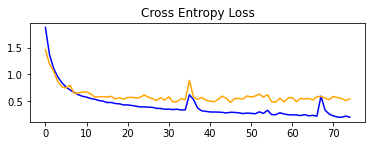

In [53]:
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(hist.history['loss'], color='blue', label='train')
pyplot.plot(hist.history['val_loss'], color='orange', label='test')

### Evaluation of Accuracy Function
Here our Training accuracy is obove the Training accuracy. So, We can say that there is no overfitting in this case

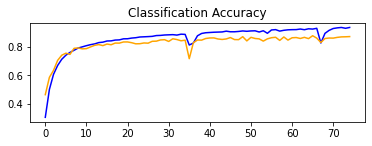

In [54]:
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(hist.history['accuracy'], color='blue', label='train')
pyplot.plot(hist.history['val_accuracy'], color='orange', label='test')